In [41]:
import pandas as pd
import numpy as np

data = pd.read_csv('D:/DS_data_sets/ml-25m/ratings.csv').drop(['movieId', 'userId'], axis = 1)

#для данного случая не требуется
data.head(2)


,rating,timestamp
0,5.0,1147880044
1,3.5,1147868817


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 2 columns):
 #   Column     Dtype  
---  ------     -----  
 0   rating     float64
 1   timestamp  int64  
dtypes: float64(1), int64(1)
memory usage: 381.5 MB


In [43]:
#Проверим как менялась частота каждой оценки во временем
#Время разбиваем на диапазоны, в каждом считаем относительную частоту каждой оценки
#дальше - heatmap, X-время, Y-оценка, heat-относительная частота за данный промежуток

#количество шагов разбиения
sample_count = 100
range_step = (data['timestamp'].max() - data['timestamp'].min())/(sample_count)
min_range = data['timestamp'].min()


def return_hour(timestamp):
    """возвращает к какому диапазону относится timestamp"""
    return int((timestamp - min_range) // range_step)
    

data['timestamp_range'] = data['timestamp'].apply(return_hour)

#data['timestamp_hour'].value_counts()

In [44]:
data.sample(5)

,rating,timestamp,timestamp_range
14136573,2.5,1515237867,92
295729,5.0,1048375998,32
7703311,2.0,1303837212,65
564140,5.0,1036259139,31
13982890,4.0,1440288027,82


In [45]:
#количесиво получившихся диаразонов
#может ьыть меньше чем заданное из за разряженности timestamp - когда то оценок не было,а время шло
data['timestamp_range'].nunique()

97

In [46]:
plot_data = data.pivot_table(index = 'timestamp_range', columns = 'rating', 
                             values = 'timestamp', aggfunc = 'count', fill_value = 0).reset_index()

In [47]:
plot_data.head(20)

rating,timestamp_range,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,0,0,0,0,0,0,2,0,0,0,1
1,4,0,667,0,1036,0,2918,0,6499,0,6052
2,5,0,20081,0,30537,0,198816,0,140890,0,93484
3,6,0,19121,0,30658,0,212465,0,145296,0,90073
4,7,0,15609,0,25736,0,180503,0,132379,0,91524
5,8,0,8609,0,14216,0,99637,0,75821,0,54332
6,9,0,8213,0,12604,0,92240,0,68268,0,47200
7,10,0,2533,0,4315,0,21783,0,19822,0,12517
8,11,0,4020,0,8143,0,20134,0,24933,0,14985
9,12,0,3714,0,6791,0,16040,0,18980,0,11193


In [48]:
def func(df):
    #делает каждую оценку относительной для каждого диапазона
    
    #print('===')
    sum_ = df.sum() - df['timestamp_range']
    
    for i, el in enumerate(df.keys()):

        if i > 0:
            df[el] = df[el]*100 / sum_*100 #так как тип данных int
            
    return 1


plot_data.apply(func, axis=1)


0     1
1     1
2     1
3     1
4     1
     ..
92    1
93    1
94    1
95    1
96    1
Length: 97, dtype: int64

In [49]:
plot_data.pop('timestamp_range')


0      0
1      4
2      5
3      6
4      7
      ..
92    95
93    96
94    97
95    98
96    99
Name: timestamp_range, Length: 97, dtype: int64

In [50]:
plot_data.head()

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
0,0,0,0,0,0,6666,0,0,0,3333
1,0,388,0,603,0,1699,0,3784,0,3524
2,0,415,0,631,0,4109,0,2912,0,1932
3,0,384,0,616,0,4269,0,2919,0,1810
4,0,350,0,577,0,4049,0,2969,0,2053


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

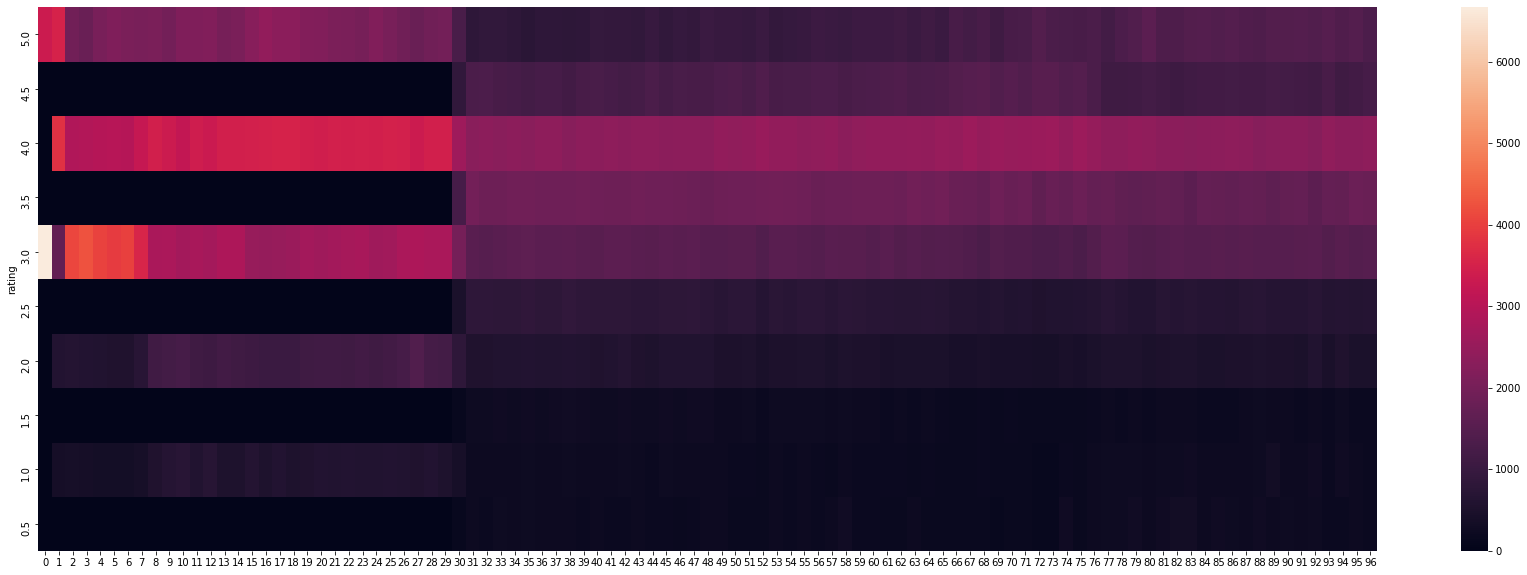

In [52]:

plt.figure(figsize = (30,10))
sns.heatmap(plot_data.T, annot=False).invert_yaxis()